# Estadistica y Probabilidad

## P value y Correlación

In [ ]:
from scipy.stats import pearsonr
import numpy as np

horas_sueño = np.array([5, 6, 7, 8, 9])
notas = np.array([60, 65, 70, 75, 90])

coef, p_value = pearsonr(horas_sueño, notas)
print(f'Correlacion: {coef:.3f}')
print(f'Valor p: {p_value:.3f}')

if p_value < 0.05:
    print('La correlacion es significativa')
    print('Se rechaza la hipotesis nula, por lo tanto las horas de sueño afectan las notas')
else:
    print('La correlacion no es significativa')
    print('No se rechaza la hipotesis nula, por lo tanto las horas de sueño afectan las notas')

Correlacion: 0.962
Valor p: 0.009
La correlacion es significativa
Se rechaza la hipotesis nula, por lo tanto las horas de sueño afectan las notas


## Distribucion de muestreo

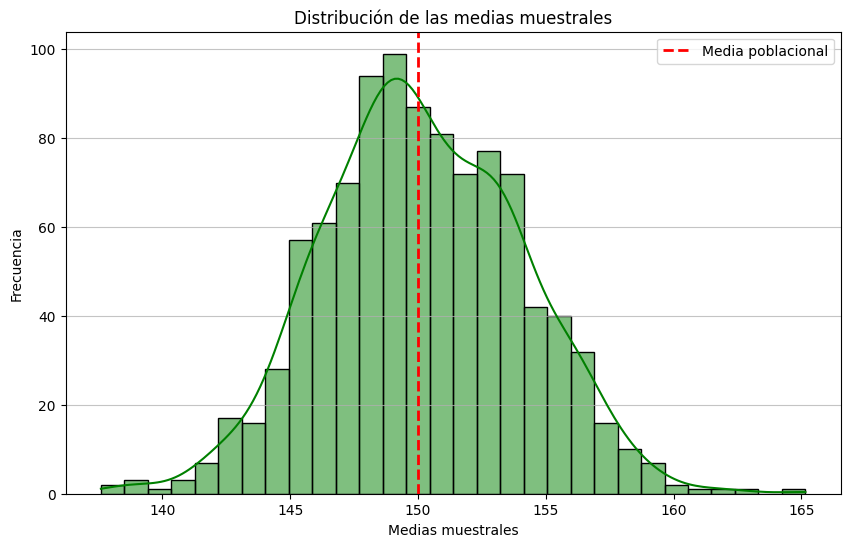

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mu_pobla = 150 #media poblacional
std_pobla = 20 #desviacion estandar
n_muestras = 1000
tam_muestra = 25
medias_muestrales = []

for _ in range(n_muestras):
    muestra = np.random.gamma(shape = (mu_pobla/ std_pobla) ** 2, scale = std_pobla ** 2 / mu_pobla, size = tam_muestra)
    media_muestrales = np.mean(muestra)
    medias_muestrales.append(media_muestrales)

plt.figure(figsize=(10, 6))
sns.histplot(medias_muestrales, bins=30, kde=True, color = 'green')
plt.axvline(mu_pobla, color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Media poblacional')
plt.title('Distribución de las medias muestrales de pesos de manzanas')
plt.xlabel('Medias muestrales de los pesos gr')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis = 'y', alpha = 0.75)
plt.show()

In [ ]:
print(f'Media de las medias muestrales {np.mean(medias_muestrales):.2f} gr')
print(f'Desviacion estandar de las medias muestrales {np.std(medias_muestrales):.2f} gr')
print(f'Error estandar teorico de las medias muestrales {std_pobla / np.sqrt(tam_muestra):.2f} gr')

Media de las medias muestrales 150.17 gr
Desviacion estandar de las medias muestrales 3.89 gr
Error estandar teorico de las medias muestrales 4.00 gr


## Ley de los grandes numeros

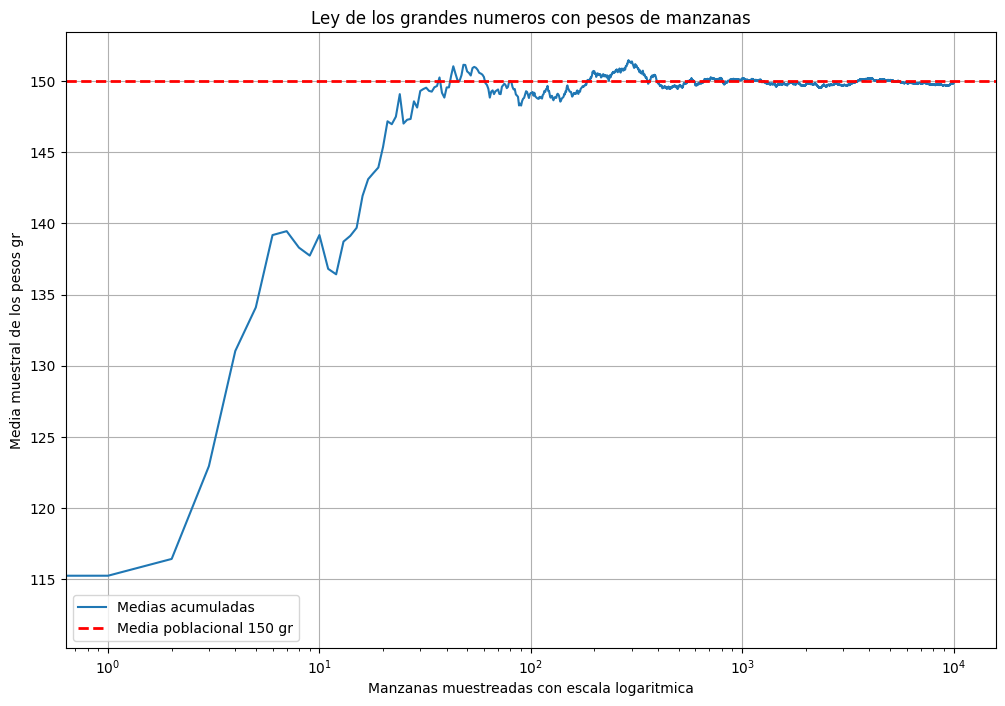

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu_pobla = 150
sigma_pobla = 20
muestra_lgn = [10, 100, 500, 1000, 5000, 10000]
medias_acum = []
obs = np.random.normal(loc = mu_pobla, scale = sigma_pobla, size = 10000)

suma = 0
contador = 0

for i in range(len(obs)):
  suma += obs[i]
  contador += 1
  medias_acum.append(suma / contador)

plt.figure(figsize = (12, 8))
plt.plot(medias_acum, label = 'Medias acumuladas')
plt.axhline(mu_pobla, color = 'red', linestyle = '--', linewidth = 2, label = f'Media poblacional {mu_pobla} gr')
plt.xscale('log') #ver convergencia
plt.title('Ley de los grandes numeros con pesos de manzanas')
plt.xlabel('Manzanas muestreadas con escala logaritmica')
plt.ylabel('Media muestral de los pesos gr')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
for i in muestra_lgn:
  print(f'Media de la muestra con n = {i}: {np.mean(obs[:i]):.2f} gr')

Media de la muestra con n = 10: 137.73 gr
Media de la muestra con n = 100: 149.05 gr
Media de la muestra con n = 500: 149.50 gr
Media de la muestra con n = 1000: 150.14 gr
Media de la muestra con n = 5000: 150.03 gr
Media de la muestra con n = 10000: 149.83 gr


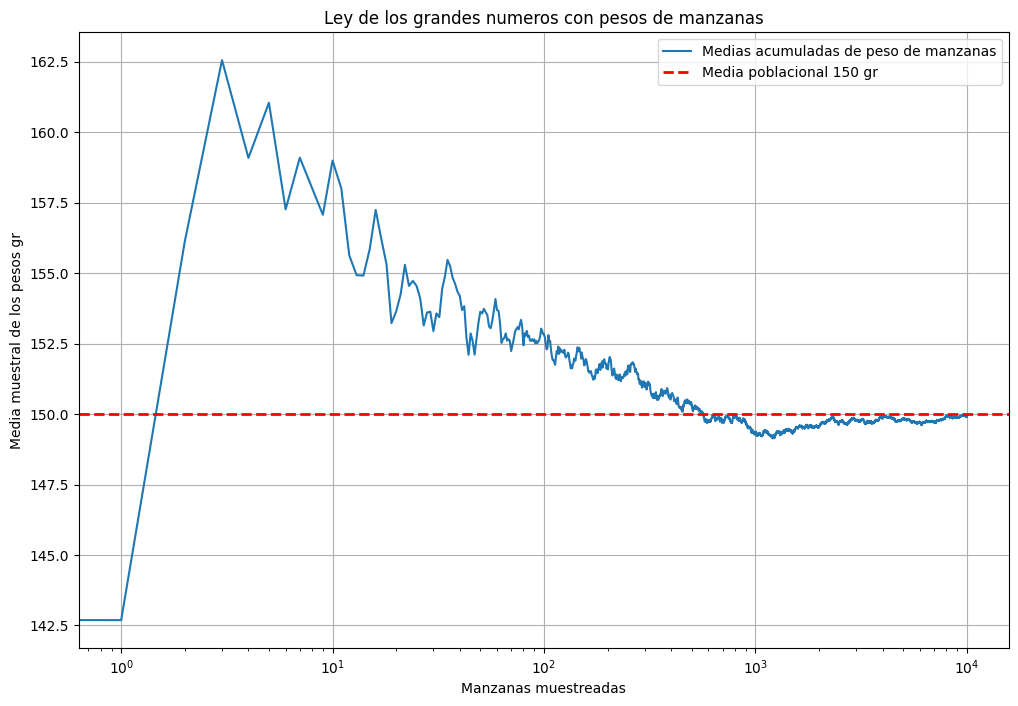

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu_pobla = 150
sigma_pobla = 20
n_sim = 10000
medias_acum = []
obs = np.random.normal(loc = mu_pobla, scale = sigma_pobla, size = n_sim)

suma = 0
contador = 0

for i in range(n_sim):
  suma += obs[i]
  contador += 1
  medias_acum.append(suma / contador)

plt.figure(figsize = (12, 8))
plt.plot(medias_acum, label = 'Medias acumuladas de peso de manzanas')
plt.axhline(mu_pobla, color = 'red', linestyle = '--', linewidth = 2, label = f'Media poblacional {mu_pobla} gr')
plt.xscale('log')
plt.title('Ley de los grandes numeros con pesos de manzanas')
plt.xlabel('Manzanas muestreadas')
plt.ylabel('Media muestral de los pesos gr')
plt.legend()
plt.grid(True)
plt.show()

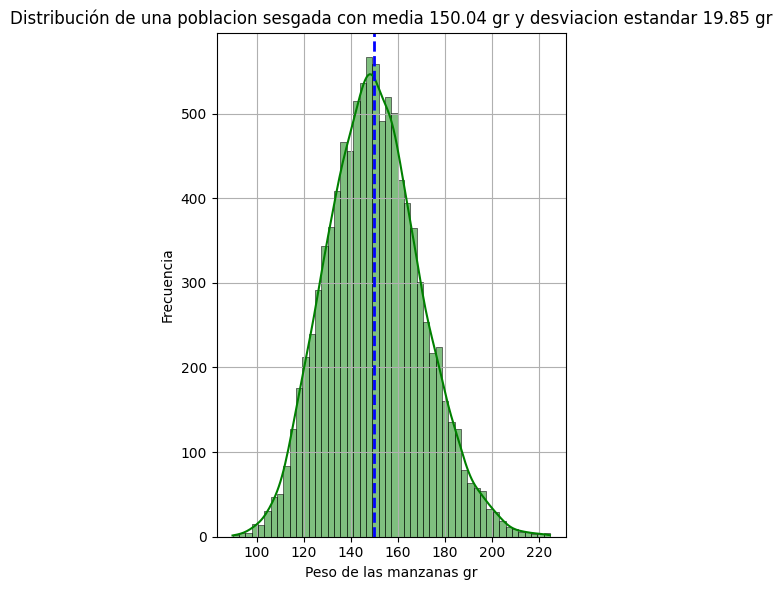

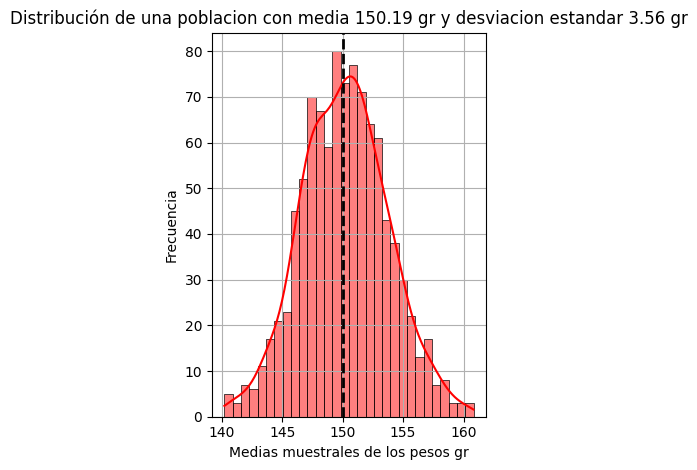

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
import matplotlib.pyplot as plt
import seaborn as sns

mu_pobla = 150
sigma_pobla = 20

alpha = (mu_pobla / sigma_pobla) ** 2
beta = sigma_pobla ** 2 / mu_pobla

pobla_sesgada = gamma.rvs(a = alpha, scale = beta, size = 10000)

plt.figure(figsize = (8, 6))
plt.subplot(1, 2, 1)
sns.histplot(pobla_sesgada, bins = 50, kde = True, color = 'green')
plt.axvline(mu_pobla, color = 'blue', linestyle = '--', linewidth = 2, label = 'Media poblacional')
plt.title(f'Distribución de una poblacion sesgada con media {np.mean(pobla_sesgada):.2f} gr y desviacion estandar {np.std(pobla_sesgada):.2f} gr')
plt.xlabel('Peso de las manzanas gr')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

n_muestra = 5000
tam_muestra_tlc = 30
media_muestra_tcl = []

for _ in range(1, n_muestras):
  muestra = np.random.choice(pobla_sesgada, size = tam_muestra_tlc, replace = True)
  media_muestra_tcl.append(np.mean(muestra))

plt.subplot(1, 2, 2)
sns.histplot(media_muestra_tcl, bins = 30, kde = True, color = 'red')
plt.axvline(mu_pobla, color = 'black', linestyle = '--', linewidth = 2, label = 'Media poblacional')
plt.title(f'Distribución de una poblacion con media {np.mean(media_muestra_tcl):.2f} gr y desviacion estandar {np.std(media_muestra_tcl):.2f} gr')
plt.xlabel('Medias muestrales de los pesos gr')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(f'Media de la poblacion simulada: {np.mean(pobla_sesgada):.2f} gr')
print(f'Desviacion estandar de la poblacion simulada: {np.std(pobla_sesgada):.2f} gr')
print(f'Media de las medias muestrales (empirica): {np.mean(media_muestra_tcl):.2f} gr')
print(f'Desviacion estandar de la poblacion muestreada (empirica): {np.std(media_muestra_tcl):.2f} gr')
print(f'Error estandar de la poblacion muestreada (empirica): {sigma_pobla / np.sqrt(tam_muestra_tlc)} gr')

Media de la poblacion simulada: 150.04 gr
Desviacion estandar de la poblacion simulada: 19.85 gr
Media de las medias muestrales (empirica): 150.19 gr
Desviacion estandar de la poblacion muestreada (empirica): 3.56 gr
Error estandar de la poblacion muestreada (empirica): 3.6514837167011076 gr


## Calculo de la probabilidad con la Distribución Muestral

In [ ]:
from scipy.stats import norm

z = 1.5
p = 1 - norm.cdf(z)
print(f'P(z) > 1.5 es: {p:.4f}')

p1 = norm.sf(z)
print(f'{p1:.4f}')

P(z) > 1.5 es: 0.0668
0.0668


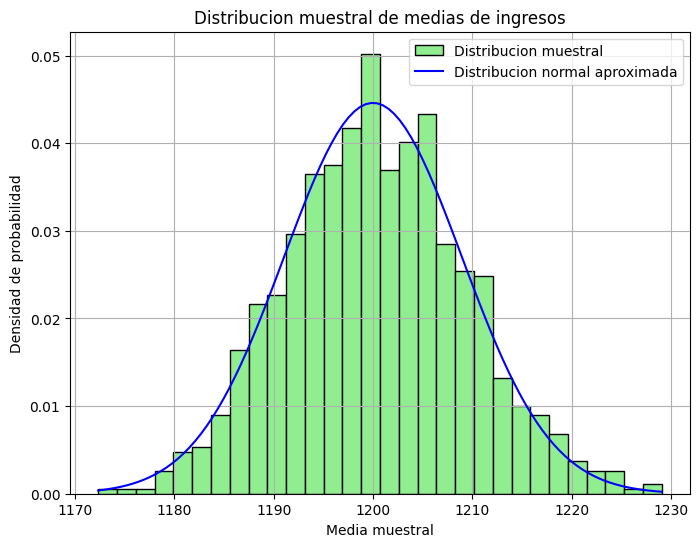

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

num_sim = 1000
medias_muestrales = []

for _ in range(num_sim):
  muestra = np.random.normal(loc = 1200, scale = 200, size = 500)
  medias_muestrales.append(np.mean(muestra))

plt.figure(figsize = (8, 6))
plt.hist(medias_muestrales, bins = 30, color = 'lightgreen', edgecolor = 'black', density = True, label = 'Distribucion muestral')
ax = np.linspace(min(medias_muestrales), max(medias_muestrales), 100)
plt.plot(ax, norm.pdf(ax, loc = 1200, scale = 200 / np.sqrt(500)), color = 'blue', label = 'Distribucion normal aproximada')
plt.title('Distribucion muestral de medias de ingresos')
plt.xlabel('Media muestral')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

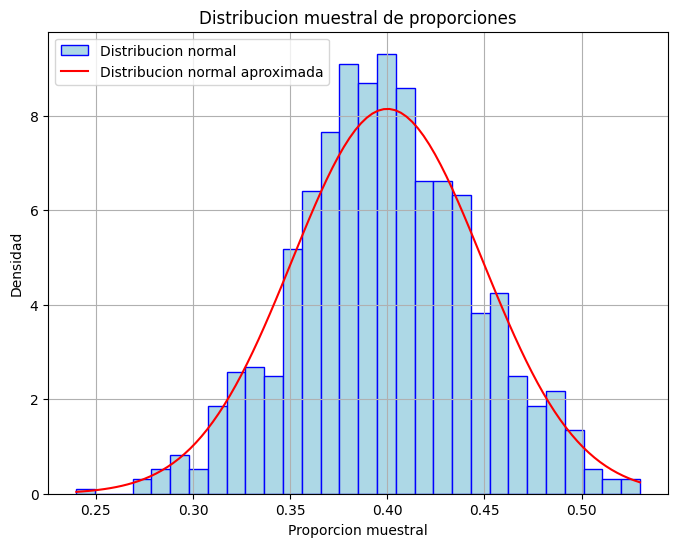

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

p_pobla = 0.4 #proporcion poblacional
muestra = 100
num_sim = 1000
prop_muestrales = [] #proporciones muestrales

for _ in range(num_sim):
  num_exitos = np.random.binomial(muestra, p_pobla, size = 1)
  prop_muestrales.append(num_exitos[0] / muestra)

plt.figure(figsize = (8, 6))
plt.hist(prop_muestrales, bins = 30, color = 'lightblue', edgecolor = 'blue', density = True, label = 'Distribucion normal')
ax = np.linspace(min(prop_muestrales), max(prop_muestrales), 100)
error_std = np.sqrt(p_pobla * (1 - p_pobla) / muestra)
plt.plot(ax, norm.pdf(ax, loc = p_pobla, scale = error_std), color = 'red', label = 'Distribucion normal aproximada')
plt.title('Distribucion muestral de proporciones')
plt.xlabel('Proporcion muestral')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu_muestral = 50
desv_pobla = 10
tam_muestra = 36
lvl_confianza = 0.95 #nivel de confianza

z_crit = norm.ppf(1- (1 - lvl_confianza) / 2)
print(f'Valor critico z para {lvl_confianza * 100}% de confianza: {z_crit:.2f}')

error_std = desv_pobla / np.sqrt(tam_muestra)
print(f'Error estandar: {error_std:.2f}')

marg_error = z_crit * error_std
print(f'Margen de error: {marg_error:.2f}')

lim_inf = mu_muestral - marg_error
lim_sup = mu_muestral + marg_error
print(f'El limite inferior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_inf:.2f}')
print(f'El limite superior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_sup:.2f}')

Valor critico z para 95.0% de confianza: 1.96
Error estandar: 1.67
Margen de error: 3.27
El limite inferior del intervalo de confianza con 95.0% es: 46.73
El limite superior del intervalo de confianza con 95.0% es: 53.27


In [ ]:
import numpy as np
from scipy.stats import t

media_muestral = 50
desv_muestral = 10
tam_muestra = 20
lvl_confianza = 0.95

grado_libertad = tam_muestra - 1

crit_t = t.ppf(1 - (1 - lvl_confianza) / 2, df = grado_libertad)
print(f'Valor critico t para {lvl_confianza * 100}% de confianza: {crit_t:.3f}, y {grado_libertad} grados de libertad')

error_std = desv_muestral / np.sqrt(tam_muestra)
print(f'Error estandar: {error_std:.2f}')

marg_error = crit_t * error_std
print(f'Margen de error: {marg_error:.2f}')

lim_inf = media_muestral - marg_error
lim_sup = media_muestral + marg_error
print(f'El limite inferior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_inf:.2f}')
print(f'El limite superior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_sup:.2f}')

Valor critico t para 95.0% de confianza: 2.093, y 19 grados de libertad
Error estandar: 2.24
Margen de error: 4.68
El limite inferior del intervalo de confianza con 95.0% es: 45.32
El limite superior del intervalo de confianza con 95.0% es: 54.68


In [ ]:
import numpy as np
from scipy.stats import norm

tam_muestra = 300
num_exitos = 120
lvl_confianza = 0.95

prop_muestral = num_exitos / tam_muestra #p gorrito
print(f'El valor de p gorrito de es {prop_muestral:.2f}')

z_crit = norm.ppf(1- (1 - lvl_confianza) / 2)
print(f'Valor critico z para {lvl_confianza * 100}% de confianza: {z_crit:.2f}')

error_std = np.sqrt(prop_muestral * (1 -  prop_muestral) /tam_muestra)
print(f'Error estandar: {error_std:.2f}')

marg_error = z_crit * error_std
print(f'Margen de error: {marg_error:.2f}')

lim_inf = prop_muestral - marg_error
lim_sup = prop_muestral + marg_error
print(f'El limite inferior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_inf * 100:.2f}%')
print(f'El limite superior del intervalo de confianza con {lvl_confianza * 100}% es: {lim_sup * 100:.2f}%')

El valor de p gorrito de es 0.40
Valor critico z para 95.0% de confianza: 1.96
Error estandar: 0.03
Margen de error: 0.06
El limite inferior del intervalo de confianza con 95.0% es: 34.46%
El limite superior del intervalo de confianza con 95.0% es: 45.54%


In [ ]:
from scipy.stats import norm

lvls_confianza = [0.90, 0.95, 0.99]

for nc in lvls_confianza:
  z_crit = norm.ppf(1- (1 - nc) / 2)
  print(f'Valor critico z para {nc * 100}% de confianza: {z_crit:.2f}')

Valor critico z para 90.0% de confianza: 1.64
Valor critico z para 95.0% de confianza: 1.96
Valor critico z para 99.0% de confianza: 2.58


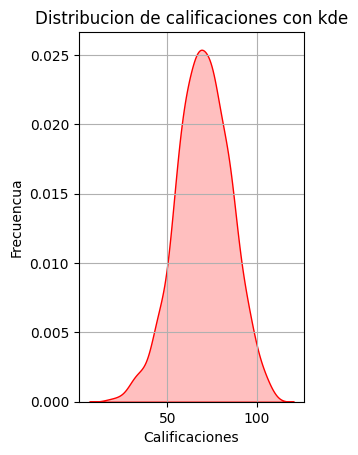

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

resultados = np.random.randn(1000) * 15 + 70

#plt.subplot(1, 2, 1)
#sns.histplot(data = resultados, kde = True, color = 'blue', bins = 30)
plt.subplot(1, 2, 2)
sns.kdeplot(data = resultados, fill = True, color = 'red')
plt.title('Distribucion de calificaciones con kde')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencua')
plt.grid(True)
plt.show()

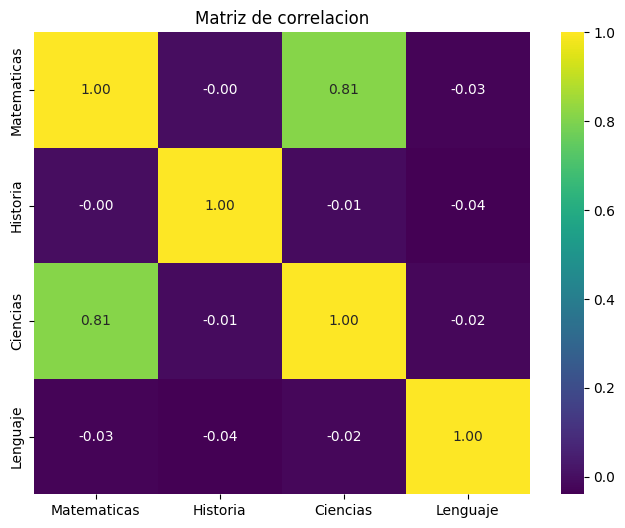

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

data = {'Estudiante': [f'Estudiante_{i}'for i in range(1, 1001)],
        'Matematicas': np.random.normal(loc = 75, scale = 10, size = 1000),
        'Historia': np.random.normal(loc = 70, scale = 12, size = 1000),
        'Ciencias': np.random.normal(loc = 65, scale = 8, size = 1000),
        'Lenguaje': np.random.normal(loc = 80, scale = 7, size = 1000),
        'Genero': np.random.choice(['M', 'F'], 1000)}

df = pd.DataFrame(data)

df['Matematicas'] = df['Matematicas'] + np.random.normal(loc = 0, scale = 5, size = 1000)
df['Ciencias'] = df['Ciencias'] + df['Matematicas']

matriz_corr = df.select_dtypes('number').corr()
#print('Matriz de correlacion')
#matriz_corr

plt.figure(figsize = (8, 6))
sns.heatmap(data = matriz_corr, annot = True, fmt = '.2f', cmap = 'viridis')
plt.title('Matriz de correlacion')
plt.show()

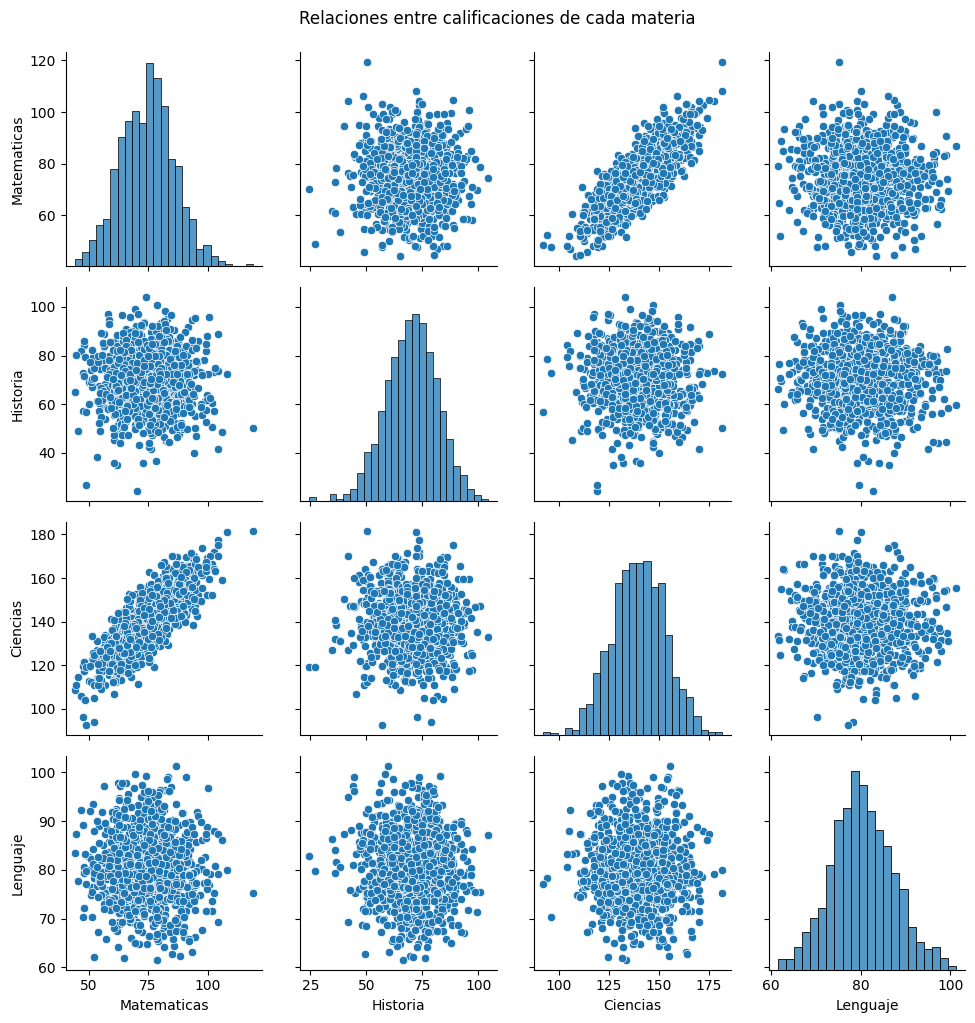

In [14]:
g = sns.PairGrid(data = df, x_vars = ['Matematicas', 'Historia', 'Ciencias', 'Lenguaje'])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.fig.suptitle('Relaciones entre calificaciones de cada materia', y = 1.02)
plt.show()